<a href="https://colab.research.google.com/github/alicepearse/DL_prac/blob/master/CNN_fashion_MNIST_practise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, Flatten, Dropout

In [39]:
# Load the data
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
#cifar = tf.keras.datasets.cifar10.load_data()

In [40]:
x_train, x_test = x_train/255. , x_test/255.
print("x_train shape:", x_train.shape)

x_train shape: (60000, 28, 28)


In [41]:
# reshape the data to add a colour channel if there isnt one
x_train = np.expand_dims(x_train, -1)
X_test = np.expand_dims(x_test, -1)
# flatten labels if necessary
# y_train = Flatten(y_train)
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28, 1)
(60000,)


In [42]:
# number of classes
K = len(set(y_train))
print("Number of Classes:", K)

Number of Classes: 10


In [43]:
# Build the model
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation='relu')(i)
x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
x = Conv2D(128, (3,3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [44]:
# compile and fit
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 27s 15ms/step - loss: 0.5186 - accuracy: 0.8073 - val_loss: 0.3997 - val_accuracy: 0.8479
Epoch 2/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.3611 - accuracy: 0.8645 - val_loss: 0.3524 - val_accuracy: 0.8659
Epoch 3/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.3128 - accuracy: 0.8820 - val_loss: 0.3579 - val_accuracy: 0.8684
Epoch 4/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2818 - accuracy: 0.8938 - val_loss: 0.3092 - val_accuracy: 0.8851
Epoch 5/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2563 - accuracy: 0.9033 - val_loss: 0.2869 - val_accuracy: 0.8936
Epoch 6/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2327 - accuracy: 0.9113 - val_loss: 0.2990 - val_accuracy: 0.8914
Epoch 7/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2135 - accuracy: 0.9189 - val_loss: 0.2993 -

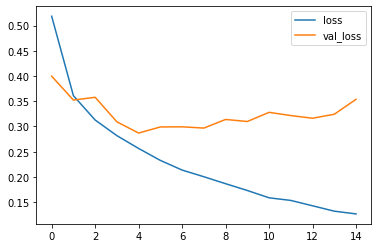

In [45]:
# Plot loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

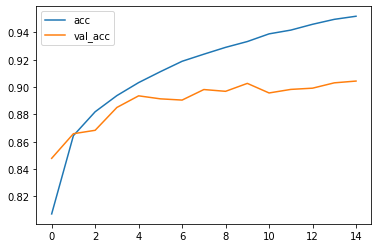

In [46]:
# Plot accuracy
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix without normalization
[[860   1  20  21   1   2  83   0  12   0]
 [  0 975   1  17   2   0   2   0   3   0]
 [ 21   1 889   9  28   0  52   0   0   0]
 [ 14   5  21 917  28   0  15   0   0   0]
 [  1   1  74  26 821   1  72   0   4   0]
 [  1   0   0   0   0 974   0  15   1   9]
 [106   0  75  29  65   0 708   0  17   0]
 [  0   0   0   0   0  13   0 955   1  31]
 [  0   1   3   5   3   4   5   2 977   0]
 [  0   0   1   0   0   6   0  25   0 968]]


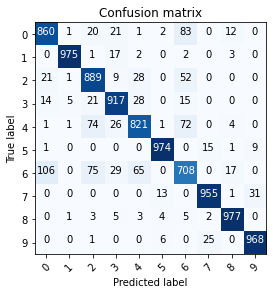

In [47]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  if normalize:
    cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix without normalization")

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.colorbar
  plt.title(title)
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))



In [48]:
# Label mapping
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

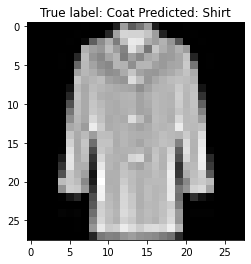

In [49]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));